## DATA3OO - Final Project
## Fall 2023 - Professor Kennedy Odongo
## Tai Nguyen

In [227]:
# Import necessary modules and packages

import pandas as pd # v 1.5.3
import numpy as np # v 1.21.5
import statsmodels.api as sm # v 0.13.5
import matplotlib.pyplot as plt # 3.6.3
import pandas_profiling as pp # v 3.6.3
import warnings as ww
import statsmodels.tsa.stattools as stattools  # v 0.13.5
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from imblearn.under_sampling import RandomUnderSampler

%matplotlib inline

## EDA

In [228]:
# Read in the dataset
bankcruptcy = pd.read_csv("/Users/tainguyen103/Downloads/company_bankruptcy_data.csv")

In [229]:
# Display first 10 rows of dataset
bankcruptcy.head(10)

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801


In [230]:
# Display last 10 rows of dataset
bankcruptcy.tail(10) 

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6809,0,0.448740,0.500055,0.500937,0.606012,0.606012,0.998843,0.797118,0.809096,0.303314,...,0.776535,0.000386,0.623426,0.606009,0.838527,0.279303,0.026738,0.564889,1,0.031177
6810,0,0.578901,0.648005,0.631725,0.602841,0.602841,0.999026,0.797490,0.809402,0.303580,...,0.846995,0.000995,0.624040,0.602840,0.844588,0.280905,0.026813,0.565259,1,0.025787
6811,0,0.518062,0.567870,0.565823,0.612736,0.612527,0.999140,0.797745,0.809603,0.303789,...,0.815844,0.003725,0.622780,0.612735,0.841355,0.277588,0.026864,0.565483,1,0.043531
6812,0,0.491639,0.549498,0.537877,0.613219,0.613168,0.998999,0.797436,0.809344,0.303543,...,0.806743,0.000548,0.623743,0.613219,0.840676,0.276560,0.026811,0.565253,1,0.061753
6813,0,0.477600,0.531127,0.526099,0.595829,0.595858,0.998905,0.797375,0.809294,0.303634,...,0.794028,0.003475,0.623398,0.595827,0.839864,0.281325,0.022309,0.571752,1,0.024803
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009
6818,0,0.493053,0.570105,0.549548,0.627409,0.627409,0.998080,0.801987,0.813800,0.313415,...,0.815956,0.000707,0.626680,0.627408,0.841019,0.275114,0.026793,0.565167,1,0.233902


In [231]:
# Size of dataset
bankcruptcy.shape

(6819, 96)

### Dataset has 6819 records and 96 variables

In [232]:
# Stats summary
bankcruptcy.describe()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [233]:
# Find missing values in the dataset
missing_values = bankcruptcy.isna().sum()
columns_with_missing_values = missing_values[missing_values > 0].index
print(columns_with_missing_values)

Index([], dtype='object')


### An empty array is returned, which indicates that there is no missing values across every column of the dataset. Dataset is good to proceed with next steps

In [234]:
# Are the classes of the response variable balanced?
bankcruptcy["Bankrupt"].value_counts()

0    6599
1     220
Name: Bankrupt, dtype: int64

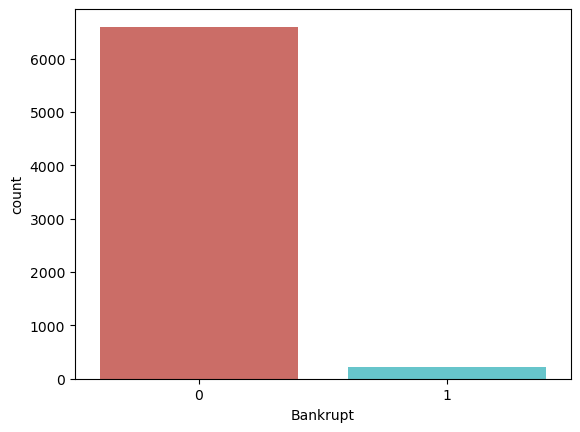

In [235]:
# Visualize class imbalance
sns.countplot(x="Bankrupt", data=bankcruptcy, palette="hls")
plt.show()

### As seen, classes are highly imbalanced within the response variable. We will perform undersampling - a technique to balance uneven datasets by keeping all of the data in the minority class and decreasing the size of the majority class.

In [236]:
y = bankcruptcy["Bankrupt"]
X = bankcruptcy.loc[:, bankcruptcy.columns != "Bankrupt"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [237]:
# Instantiate the RandomUnderSampler object
undersampler = RandomUnderSampler(sampling_strategy={0: 220, 1: 220}, random_state=42)

# Fit and transform the data
X_under, y_under = undersampler.fit_resample(X, y)
print(y_under.value_counts())

0    220
1    220
Name: Bankrupt, dtype: int64


### The newly sampled dataset has a balanced class distribution

# Part 1a: Random Forest

## 1. Fit the model using default parameters

In [238]:
y = bankcruptcy["Bankrupt"]
X = bankcruptcy.loc[:, bankcruptcy.columns != "Bankrupt"] 

In [239]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [240]:
# Instantiate the RandomeForestClassifier object
rfc = RandomForestClassifier() #default criterion is 'gini'

In [241]:
# Fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [242]:
# Predict the Test set results
y_pred = rfc.predict(X_test)

In [243]:
# Check accuracy score 
print('Default-parameter model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Default-parameter model accuracy score: 0.9655


In [244]:
# Display a classification report for more detailed metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.67      0.16      0.25        51

    accuracy                           0.97      1364
   macro avg       0.82      0.58      0.62      1364
weighted avg       0.96      0.97      0.96      1364



## 2. Refit the model using non-default parameters and comment on the preferred model

In [245]:
# Instantiate the RandomeForestClassifier object
rfc2 = RandomForestClassifier(criterion="entropy", 
                              n_estimators=200, 
                              max_depth=30, 
                              min_samples_split=4,
                              min_samples_leaf=2)

In [246]:
# Fit the model
rfc2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_leaf=2,
                       min_samples_split=4, n_estimators=200)

In [247]:
# Predict the Test set results
y_pred = rfc2.predict(X_test)

In [248]:
# Check accuracy score 
print('Nondefault-parameter model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Nondefault-parameter model accuracy score: 0.9663


In [249]:
# Display a classification report for more detailed metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.78      0.14      0.23        51

    accuracy                           0.97      1364
   macro avg       0.87      0.57      0.61      1364
weighted avg       0.96      0.97      0.95      1364



### Model 2 (with non-default parameters) is preferred to model 1 (with default parameters) since it has generated a slightly greater accuracy level

## 3. Model running time analysis

In [250]:
%%time
rfc.fit(X_train, y_train)

CPU times: user 2.21 s, sys: 27 ms, total: 2.24 s
Wall time: 2.24 s


RandomForestClassifier()

In [251]:
%%time
rfc2.fit(X_train, y_train)

CPU times: user 3.3 s, sys: 14.5 ms, total: 3.32 s
Wall time: 3.51 s


RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_leaf=2,
                       min_samples_split=4, n_estimators=200)

### It can be seen that model 1 had lesser CPU running times compared to model 2 (2.24 ms - 3.32 ms) due to lesser parameter complexity

## 4. Which parameter combinations give the best results for classification? “Gini” or “entropy” as splitting metric? 

In the context of this workbook, a combination of parameters like those in model 2 may have yielded the better classification results. However, it is also worth noting that these stats are not yet the best selection of parameters. Finding the best parameter combinations for a Random Forest classifier often involves hyperparameter tuning, and the optimal parameter values can depend on the specific dataset we work with.

Personally, I would prefer "gini" over "entropy" as the splitting metric as it is the default criterion and does not need to be specified - which would save a little more time implementing models while achieving approximately equivalent results

## 5. Which feature is the most important?

In [252]:
# Get feature importances
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
feature_importances = rfc.feature_importances_

In [279]:
# Create a list of feature names 
feature_names = list(X_train.columns)

# Create a dictionary with feature names and their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Print feature importance for specific figures
for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True):
     print(f"{feature}: {importance}")

 Net Income to Stockholder's Equity: 0.024685821086706364
 Persistent EPS in the Last Four Seasons: 0.024532596767206358
 Net Value Growth Rate: 0.024530530099114784
 Borrowing dependency: 0.024095140769989764
 Degree of Financial Leverage (DFL): 0.02029002974306858
 Net Income to Total Assets: 0.019946487825234806
 Net profit before tax/Paid-in capital: 0.01864875740309579
 Debt ratio %: 0.018554938413990803
 Net Value Per Share (A): 0.018495836879417988
 Interest Coverage Ratio (Interest expense to EBIT): 0.018454061463731998
 Net Value Per Share (B): 0.018074984058211077
 Interest Expense Ratio: 0.01805126197156408
 Non-industry income and expenditure/revenue: 0.017004534404195415
 Cash/Total Assets: 0.016191818685718146
 Interest-bearing debt interest rate: 0.015547707401171038
 Per Share Net profit before tax (Yuan ¥): 0.014736138336960651
 Net worth/Assets: 0.014554240115745885
 Equity to Liability: 0.014272435996803178
 ROA(A) before interest and % after tax: 0.01421103460140149

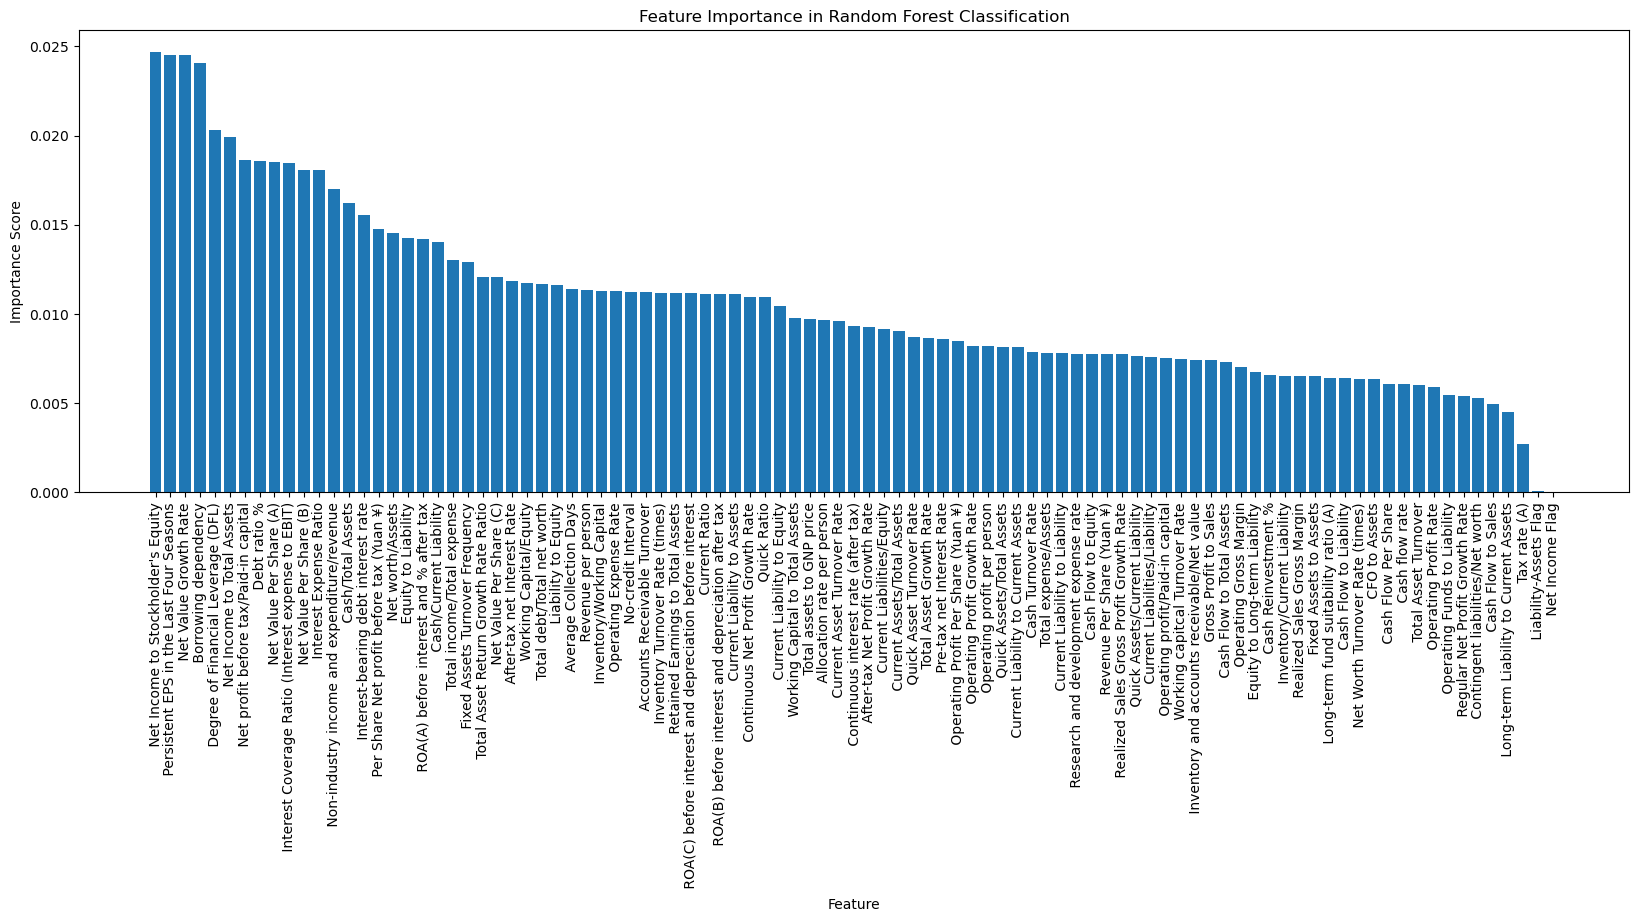

In [254]:
# Visualize the feature importance
import matplotlib.pyplot as plt

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Plotting
plt.figure(figsize=(20, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Random Forest Classification")
plt.show()

### It can be seen that Net Value Growth Rate proves to be the most significant in this classification and contributes most to the predictive performance of the model.

## 6. Choose one of the models from number 1. Or number 2, display, and discuss the decision rules. Do the rules make sense for classification?  

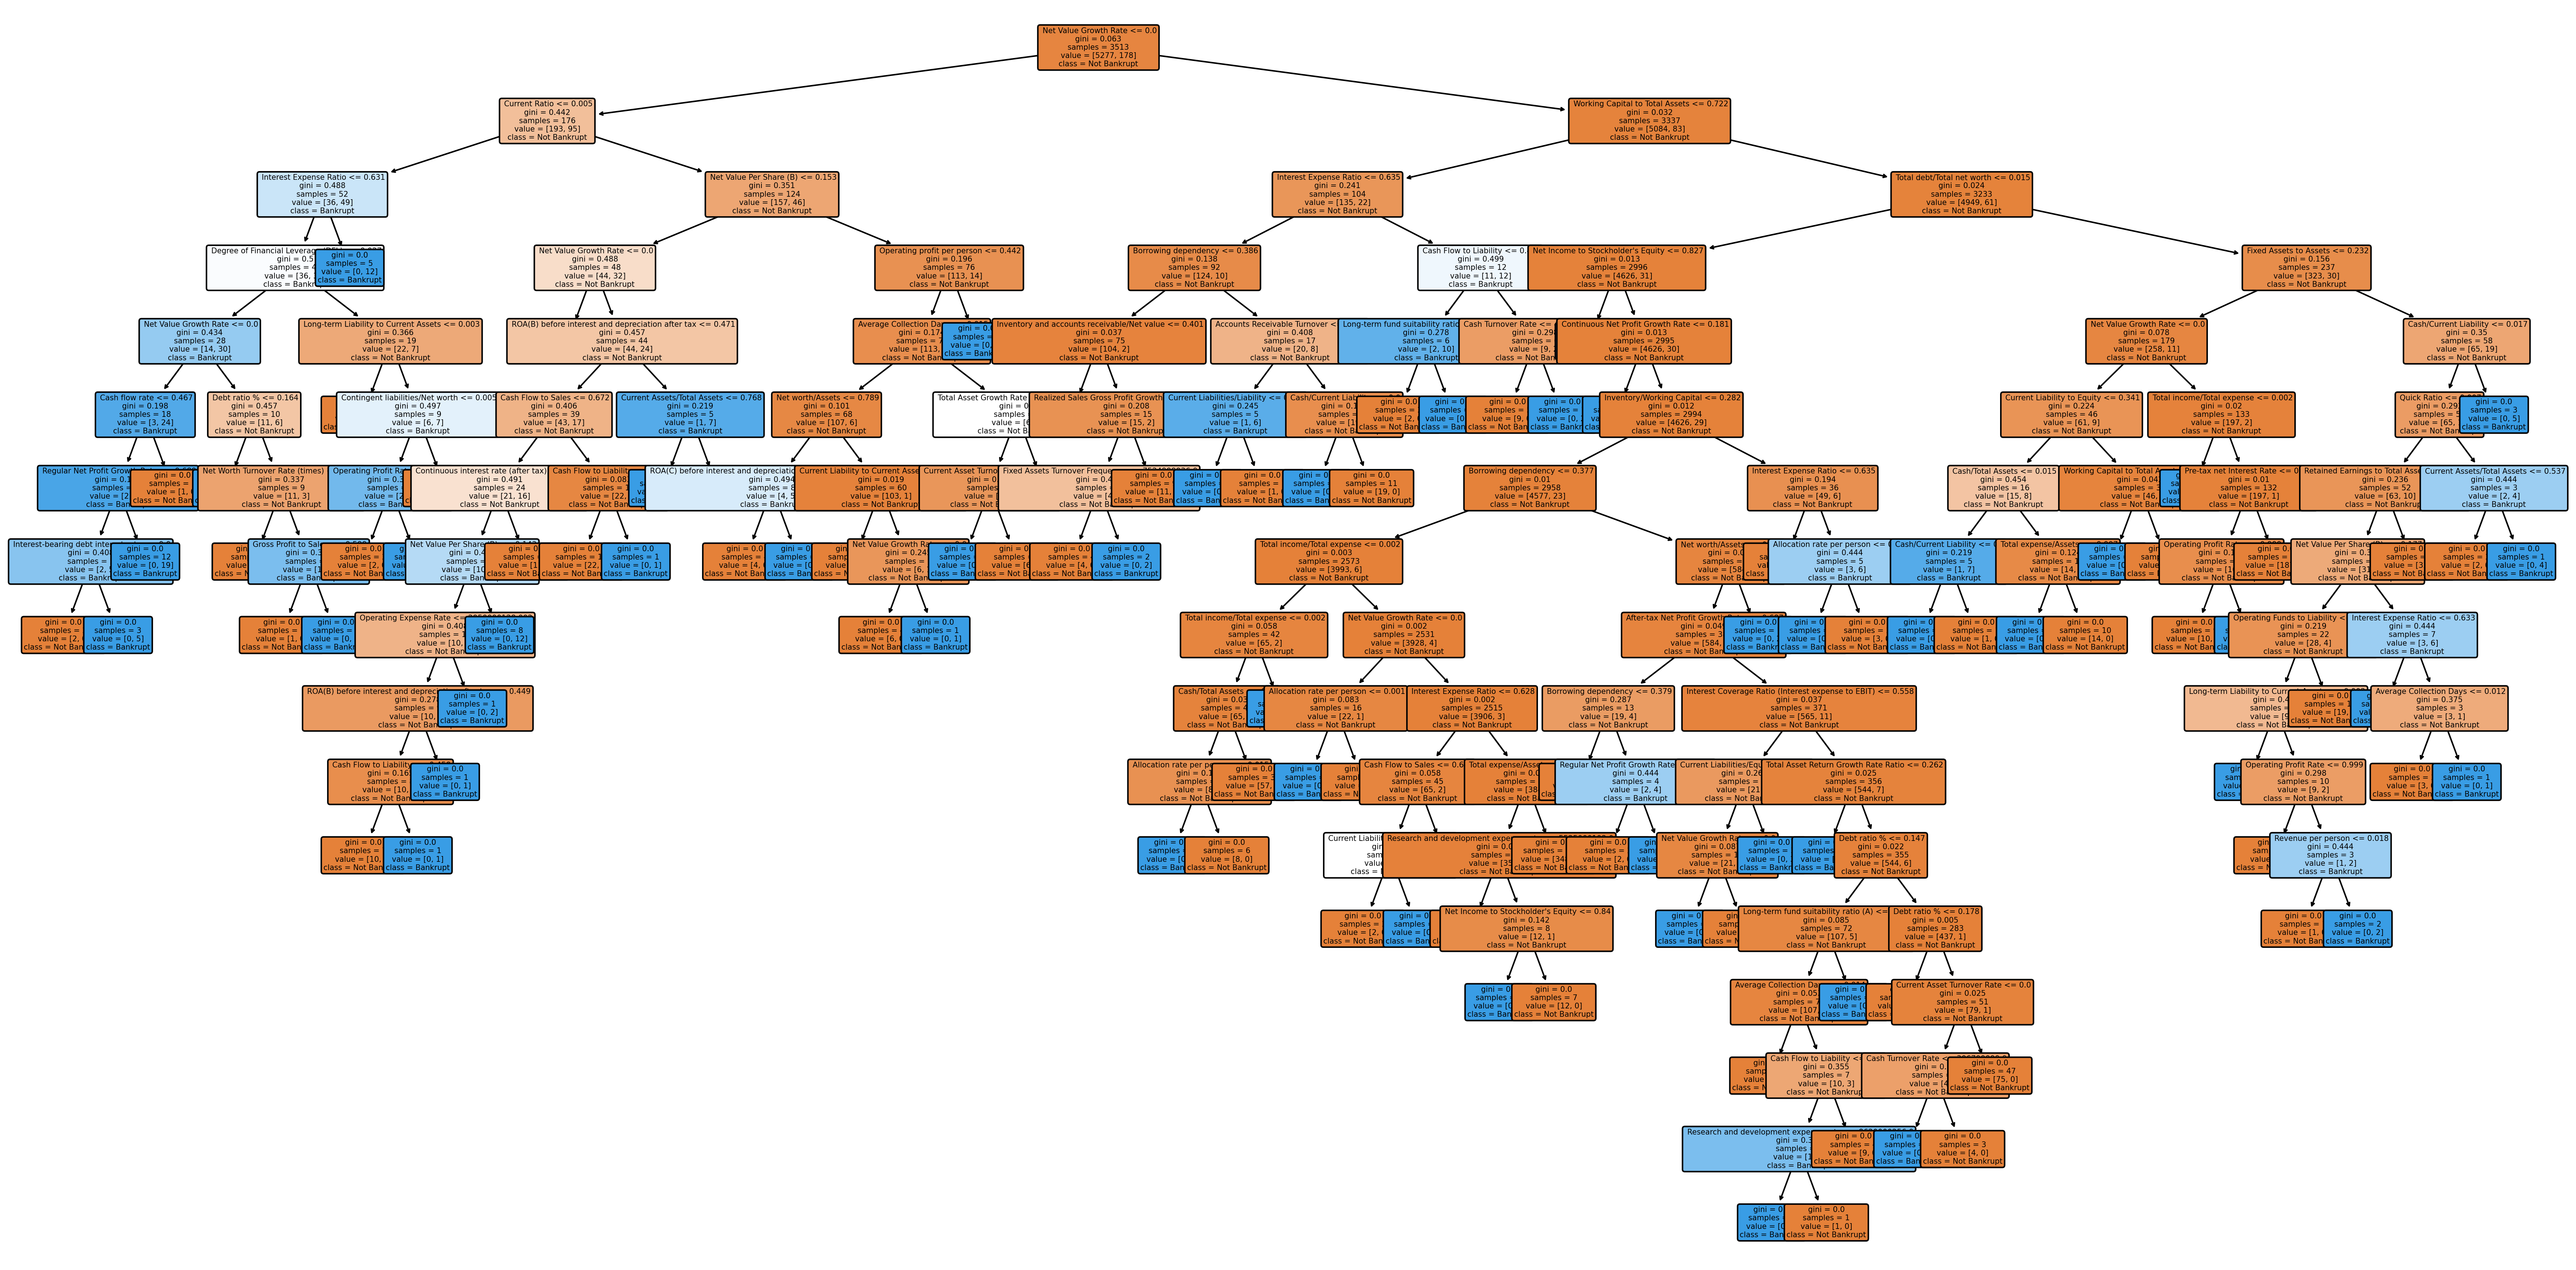

In [255]:
# Plot the decision tree
from sklearn.tree import plot_tree
from IPython.display import Image

# Plot the first decision tree in the forest
plt.figure(figsize=(30,15), dpi=300) 
plot_tree(rfc.estimators_[0], 
          feature_names=feature_names, 
          filled=True,
          rounded=True,
          class_names=["Not Bankrupt", "Bankrupt"],
          fontsize=5) 
plt.show()

### It can be seen that although there are still limitations, the rules generally seem to make sense for the classification

## 7.	On average, what may be the tradeoff between model fitting time and model performance? 

The tradeoff between model fitting time and performance hinges on the task's specific needs and constraints. Simpler models with shorter fitting times, like linear models, may sacrifice some predictive accuracy but have better computational efficiency and interpretability. In contrast, more complex models may provide higher performance at the cost of longer fitting times and increased computational resources. The optimal choice depends on factors like task requirements, dataset size, interpretability needs, and available computational resources, with practitioners often striking a balance through experimentation and optimization.

# Part 1b: Support Vector Machine

## 1. Fit the model on the training set using the default parameters and report your findings

In [256]:
# Create an SVM classifier  
svm = SVC()  

# Fit the model to the training data  
svm.fit(X_train, y_train)  

SVC()

In [257]:
# Make predictions on the test set   
y_pred = svm.predict(X_test)   

In [258]:
# Evaluate the performance of the model   
accuracy = accuracy_score(y_test, y_pred)  
print(f"Accuracy: {accuracy:.4f}")   

Accuracy: 0.9626


In [259]:
# Display a classification report for more detailed metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.94      1364



/Users/tainguyen103/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tainguyen103/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tainguyen103/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2. Change the kernel from “rbf” to “linear” and repeat the model fitting procedure in 1 above 

In [260]:
# Create an SVM classifier
svm2 = SVC(kernel='poly') #alternate kernel for linear
#svm2 = SVC(kernel='linear')

In [261]:
# Fit the model to the training data
svm2.fit(X_train, y_train)

SVC(kernel='poly')

In [262]:
# Make predictions on the test set
y_pred = svm2.predict(X_test)

In [263]:
# Evaluate the performance of the model   
accuracy = accuracy_score(y_test, y_pred)  
print(f"Accuracy: {accuracy:.4f}")   

Accuracy: 0.9619


In [264]:
# Display a classification report for more detailed metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.94      1364



## 3. Evaluate both models using metrics of choice 

### It can be seen that with regard to accuracy levels, svm model 1 ('rbf') generated a slightly greater results compared to svm model 2 ('poly')

## 4. Running time

In [265]:
%%time
svm.fit(X_train, y_train) #rbf

CPU times: user 556 ms, sys: 7.71 ms, total: 564 ms
Wall time: 565 ms


SVC()

In [266]:
%%time
svm2.fit(X_train, y_train) #poly

CPU times: user 567 ms, sys: 5.24 ms, total: 572 ms
Wall time: 573 ms


SVC(kernel='poly')

# Part 2: Using sampled data

## 1. Fit the models and compare running times

In [267]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

In [268]:
rfc_under = RandomForestClassifier()

In [269]:
# fit the model
rfc_under.fit(X_train_under, y_train_under)

RandomForestClassifier()

In [270]:
# Predict the Test set results
y_pred_under = rfc_under.predict(X_test_under)

In [271]:
# Check accuracy score 
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test_under, y_pred_under)))

Model accuracy score: 0.8977


In [272]:
%%time
rfc_under.fit(X_train_under, y_train_under)

CPU times: user 369 ms, sys: 29.5 ms, total: 398 ms
Wall time: 400 ms


RandomForestClassifier()

In [273]:
svm_under = SVC()

In [274]:
# fit the model
svm_under.fit(X_train_under, y_train_under)

SVC()

In [275]:
# Make predictions on the test set
y_pred_under = svm_under.predict(X_test_under)

In [276]:
# Evaluate the performance of the model   
accuracy = accuracy_score(y_test_under, y_pred_under)  
print(f"Accuracy: {accuracy:.4f}")   

Accuracy: 0.5227


In [277]:
%%time
svm_under.fit(X_train_under, y_train_under)

CPU times: user 13.8 ms, sys: 1.39 ms, total: 15.2 ms
Wall time: 14.1 ms


SVC()

### It can be seen that for the undersampled data, RandomForrestClassifier model generated much greater CPU times than SVM model (398 ms - 15.2 ms)

## 2. Evaluate both models using metrics of choice

### With regard to accuracy levels, RandomForrestClassifer model generated a considerably greater results than SVM model (0.90 - 0.52)